## IMPLEMENTING MACHINE LEARNING TECHNIQUES FOR CANCER PROGNOSIS
---

**Group members: Kaushal Chaudhary, Gauresh Chavan, Mohit Ruke**

__ABSTRACT__

This project presents a comparison of seven machine learning (ML) algorithms:  Logistic Regression, Multilayer Perceptron (MLP), Nearest Neighbor (NN) search , Decision Tree (DT), Random Forest (RF), Support Vector Machine (SVM) and Automatic feature selection on the Wisconsin DiagnosticBreast Cancer (WDBC) dataset by measuring their classification test accuracy, and their sensitivity and specificity values. The said dataset consists of features which were computed from digitized images of FNA tests on a breast mass. For the implementation of the ML algorithms, the dataset was partitioned in the following fashion: 70% for training phase, and 30% for the testing phase. The hyper-parameters used for all the classifiers were manually assigned. Results show that all the presented ML algorithms performed well (all exceeded 90% test accuracy) on the classification task.

__INTRODUCTION__

Breast Cancer is the most common form of cancer in women, affecting almost 12% of all women across the world. In recent years, the incidence rate keeps increasing and data show that the survival rate is 88% after first five years from diagnosis and 80% after 10 years from diagnosis. Early prediction of cancer is one of the most crucial steps in the follow-up process [3]. Over past few decades, scientists applied different methods, such as screening in early stage, so that types of cancer can be identifies before their symptoms. With advent of new technologies, a large amounts of cancer data are available to the research community. However, an accurate prediction of a disease outcome is still one of the challenging tasks for the researchers and physicians around the world [2]. In this paper, we will develop, using machine learning techniques, methods that will allow accurate prognosis of cancer. 

__BACKGROUND__ 

Today, despite the many advances in early detection of diseases, cancer patients have a poor prognosis and the survival rates in them are low [1]. In cancer prediction/prognosis one is concerned with the following [4]: 

> 1) the prediction of cancer occurence

> 2) the prediction of cancer recurrence and 

> 3) the prediction of cancer survivability. 

In the first case, one is trying to predict the likelihood of developing a type of cancer prior to the occurrence of the disease. In the second case one is trying to predict the likelihood of redeveloping cancer. In the third case one is trying to predict an outcome (life expectancy, survivability, progression, tumor-drug sensitivity) after the diagnosis of the disease. In the latter two situations the success of the prognostic prediction is obviously dependent on the success or quality of the diagnosis [4].

__DATA SOURCES__

_Cancer detection:_

UCI Machine Learning Repository : Wisconsin Diagnostic Dataset for Breast Cancer (WDBC) https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

_Cancer Recurrence and Survivability:_

ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WPBCC/ 

__REFERENCES__

 > [1] [Azadeh Bashiri, Marjan Ghazisaeedi,* Reza Safdari, Leila Shahmoradi, and Hamide Ehtesham .Improving the Prediction of Survival in Cancer Patients by Using Machine Learning Techniques: Experience of Gene Expression Data: A Narrative Review](http://ijph.tums.ac.ir/index.php/ijph/article/view/9044)
 
 > [2] [Konstantina Kourou, Themis P. Exarchos, Konstantinos P. Exarchos, Michalis V. Karamouzis, Dimitros I. Fotiadis. Machine learning applications in cancer prognosis and prediction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4348437/)
 
 > [3] [Using Three Machine Learning Techniques for Predicting Breast Cancer Recurrence Ahmad LG*, Eshlaghy AT, Poorebrahimi A, Ebrahimi M and Razavi AR](https://www.omicsonline.org/using-three-machine-learning-techniques-for-predicting-breast-cancer-2157-7420.1000124.php?aid=13087)
 
 > [4] [Applications of Machine Learning in Cancer Prediction and Prognosis Joseph A. Cruz and David S. Wishart](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675494/)
 
 > [5] [On Breast Cancer Detection: An Application of Machine Learning Algorithms on the Wisconsin Diagnostic Dataset Abien Fred M. Agarap](https://arxiv.org/pdf/1711.07831.pdf)

**Importing useful packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Reading data from CSV**

In [2]:
cancer = pd.read_csv("cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
cancer.shape

(569, 32)

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### KNN
---

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [133]:
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.952
Accuracy of KNN n-5, on the test set: 0.924


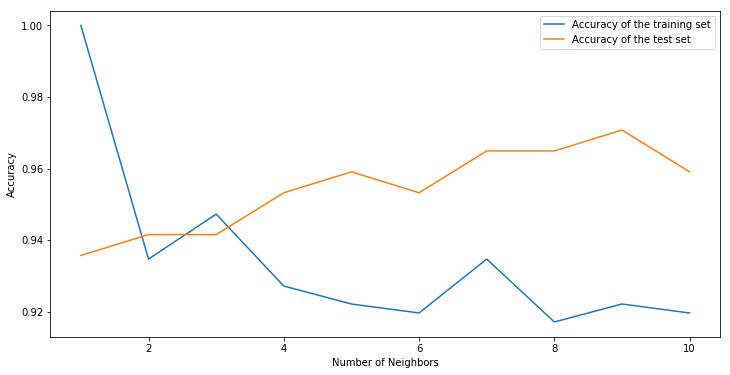

In [131]:
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


training_accuracy = []
test_accuracy = []


neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.figure(figsize=(12,6))
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

### LOGISTIC REGRESSION
---

The **diagnosis** column in our data contains string values which needs to be converted into binary integer values our logistic model to process. If the tumor is malignant, result = 1 else 0

In [177]:
def converter(result):
    if result=='M':
        return 1
    else:
        return 0

In [178]:
cancer['result'] = cancer['diagnosis'].apply(converter)

In [179]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,result
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Now, we see that we have an appropriate binary value to each of our diagnosed result. Moving on to creating our model.

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [181]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.960
Accuracy on the test subset: 0.936


**Regularization**

We will be using L2 (ridge) regularization that comes default with the LogisticRegression() from Scikit-Learn and. We will play along with C value - a parameter to control the strength of regularization and see if Regularization helps our model.

- Higher C : correct classification of each data point
- Lower C: Logmodel adjusts to the majority of the data point


In [182]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.980
Accuracy on the test subset: 0.959


In [183]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.942
Accuracy on the test subset: 0.918


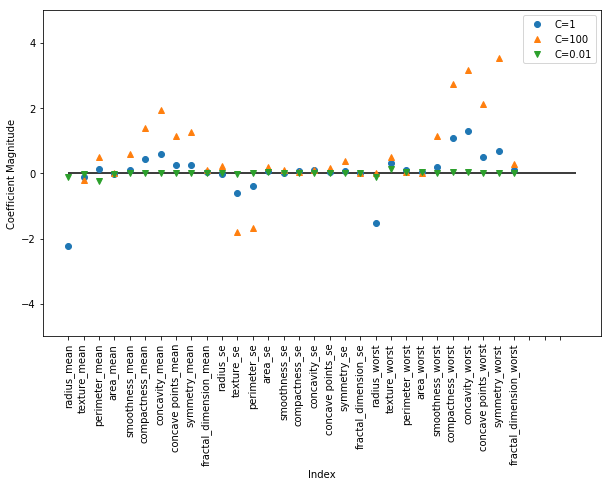

In [184]:
plt.figure(figsize=(10,6))
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.shape[1]), X, rotation=90)
plt.hlines(0,0, cancer.shape[1])
plt.ylim(-5,5)
plt.xlabel('Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

**Model Evaluation**

A better metric for binary classifiers is AUC or Area under curve. For that we first have a look at the classification report of our model. _Precision_ and _Recall_ are two important values to observe.

- Precision (relevancy) : fraction of correctly identified examples of a class (ratio of true positives to all positives)
- Recall (completeness) : fraction of observations classified in that class that were correctly identified

In [194]:
print ("---Logistic Model---")
log_roc_auc001 = roc_auc_score(y_test, log_reg001.predict(X_test))
print ("Logistic_001 AUC: ", log_roc_auc001 )
print(classification_report(y_test,log_reg001.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc100 = roc_auc_score(y_test, log_reg100.predict(X_test))
print ("Logistic_100 AUC: ", log_roc_auc100 )
print(classification_report(y_test,log_reg100.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ("Logistic AUC: ", log_roc_auc )
print(classification_report(y_test,log_reg.predict(X_test)))

---Logistic Model---
Logistic_001 AUC:  0.908008658009
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       105
          1       0.92      0.86      0.89        66

avg / total       0.92      0.92      0.92       171

---Logistic Model---
Logistic_100 AUC:  0.949783549784
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       105
          1       0.98      0.91      0.94        66

avg / total       0.96      0.96      0.96       171

---Logistic Model---
Logistic AUC:  0.925108225108
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



**Plotting ROC curve**

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr100, tpr100, thresholds100 = roc_curve(y_test, log_reg100.predict_proba(X_test)[:,1])
fpr001, tpr001, thresholds001 = roc_curve(y_test, log_reg001.predict_proba(X_test)[:,1])

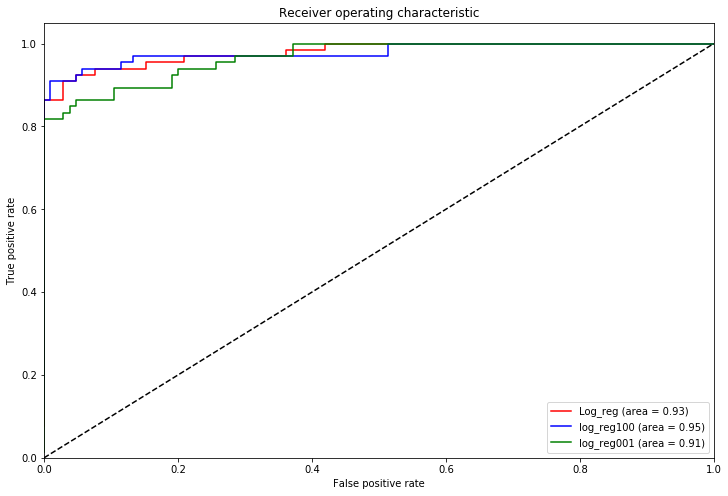

In [195]:
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label ="Log_reg (area = %0.2f)" % log_roc_auc, color ="red")
plt.plot(fpr100, tpr100, label ="log_reg100 (area = %0.2f)" % log_roc_auc100, color ="blue")
plt.plot(fpr001, tpr001, label ="log_reg001 (area = %0.2f)" % log_roc_auc001, color ="green")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## DECISION TREES
---

**Importing useful packages**

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [99]:
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer[['diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.912


In [100]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.987
Accuracy on the test subset: 0.936


**Displaying a decision tree**

1. Importing graphviz : **pip install graphviz** or **conda install -c anaconda graphviz**
2. Make sure you see the .exe file as shown in the screenshot below
3. Copy the path to this file and set it as a variable. 

**You're good to go!**

![title](img/graphviz.jpg)

In [101]:
import graphviz
from sklearn.tree import export_graphviz
from scipy import misc
import io
import pydotplus

In [102]:
print ("Training subset: ", len(X_train))
print ("Testing subset: ", len(X_test))

Training subset:  398
Testing subset:  171


In [103]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [104]:
dtree = tree.fit(X_train, y_train)

In [105]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.figure(figsize = (20,20))
    plt.imshow(img)

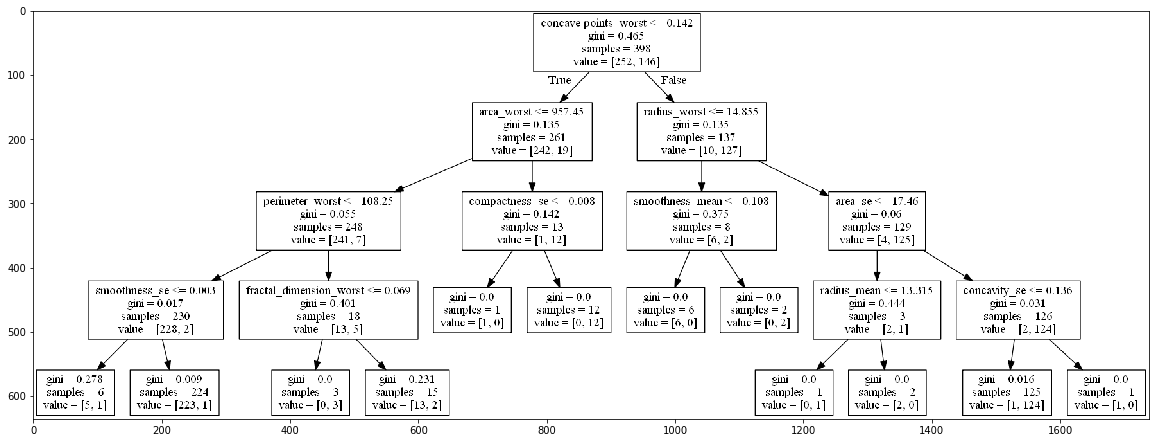

In [106]:
plt.figure(figsize = (20,20))
show_tree(dtree, features, 'dec_tree.png')

In [107]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [ 0.00758541  0.          0.          0.          0.01706717  0.          0.
  0.          0.          0.          0.          0.          0.
  0.01412079  0.00174927  0.01050288  0.01110793  0.          0.          0.
  0.04430757  0.          0.01375272  0.11254507  0.          0.          0.
  0.74589561  0.          0.02136557]


numpy.ndarray

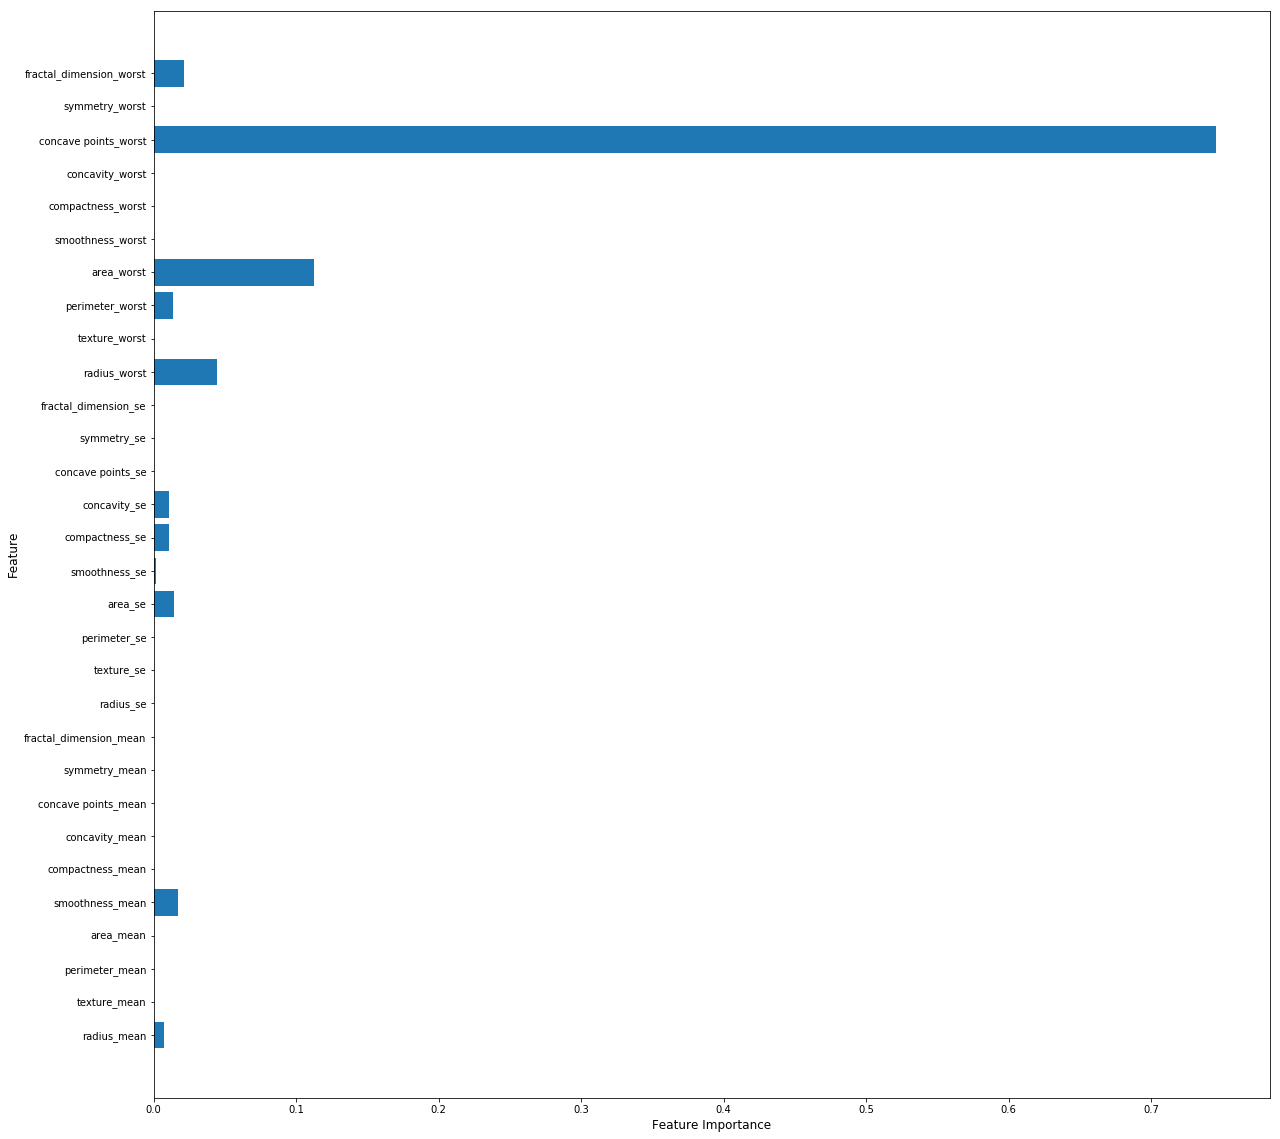

In [110]:
import numpy as np
plt.figure(figsize = (20,20))
n_features = X.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel('Feature Importance', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.show()

Remodelling by using only the important features from the plot above.

In [111]:
X = cancer[['radius_mean','smoothness_mean','area_se','compactness_se', 'concavity_se','radius_worst',
       'perimeter_worst', 'area_worst','concave points_worst','fractal_dimension_worst']]
y = cancer[['diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree1.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree1.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.924


In [112]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree2.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree2.score(X_test, y_test)))

Accuracy on the training subset: 0.985
Accuracy on the test subset: 0.930


## RANDOM FOREST
---

- Develop multiple decision trees with selection of random variables and random data
- Provides class of dependent variables based on many trees

**Random Selection of Data:** It selects various subsets of data for each tree and develops the results based on the values present in the subset

**Random Selection of Varables:** Selection of random subset of independent variables for each tree

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [165]:
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

rfc = RandomForestClassifier(n_estimators=200,random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rfc.fit(X_train,y_train)

print('Accuracy on the training subset: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(rfc.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


In [166]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [167]:
print('Accuracy on the training subset: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(rfc.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


In [168]:
y_pred=rfc.predict(X_test)

Accuracy remains the same even if we change the number of estimators.

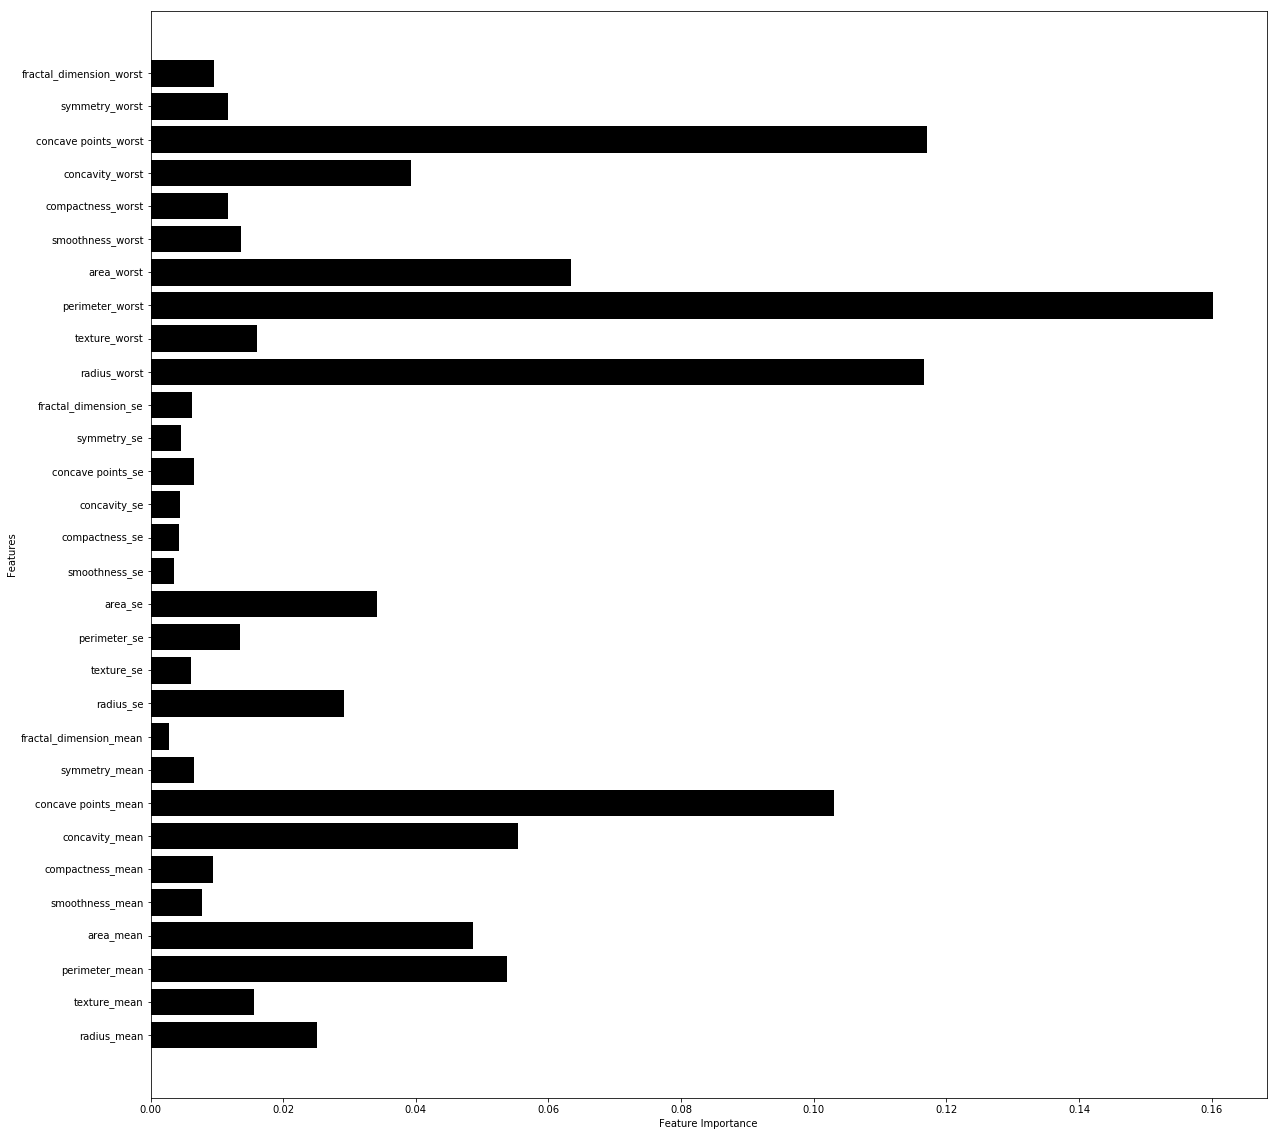

In [169]:
plt.figure(figsize = (20,20))
n_features=X.shape[1]
plt.barh(range(n_features),rfc.feature_importances_,align='center',color='black')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

The plot above states the features that are important for computing the value of target variable. The features with less weight should be avoided while selecting the feature variables.

**Selecting important features**

In [170]:
x=cancer[['compactness_mean','smoothness_worst','texture_worst','texture_mean','concave points_worst','concavity_worst','area_worst','perimeter_worst','radius_worst','area_se','radius_se','concave points_mean','concavity_mean', 'perimeter_mean','area_mean','radius_mean']]
Y=cancer['result']

In [171]:
rfc1 = RandomForestClassifier(n_estimators=200,random_state=0)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x, Y, random_state=0)
rfc1.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [172]:
print('Accuracy on the training subset: {:.3f}'.format(rfc1.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(rfc1.score(X_test_scaled, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.986


After selecting important features, we can infer that the accuracy improved when we neglected the less important features and hence got a better result.

In [173]:
y_pred_scaled=rfc1.predict(X_test_scaled)

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr4,tpr4,thresholds4= roc_curve(y_test,rfc.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds5= roc_curve(y_test,rfc1.predict_proba(X_test_scaled)[:,1])

log_roc_auc4=auc(fpr4,tpr4)
log_roc_auc5=auc(fpr5,tpr5)

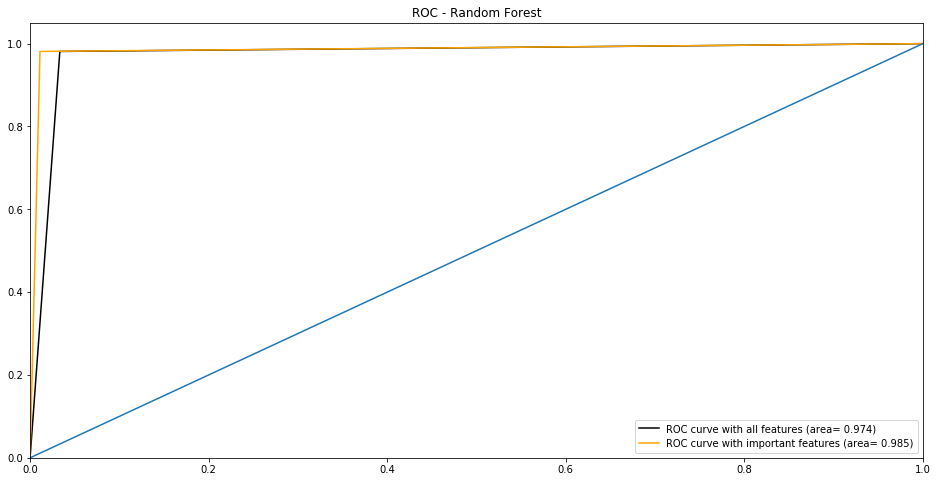

In [176]:
plt.figure(figsize=(16,8))
plt.plot(fpr,tpr,label="ROC curve with all features (area= %0.3f)" % log_roc_auc,color="black")
plt.plot(fpr1,tpr1,label="ROC curve with important features (area= %0.3f)" % log_roc_auc1,color="orange")
plt.plot([0,1],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

## SVM
---

In [42]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y = cancer['result']
print(X.shape,'X')
print(Y.shape,'Y')

(569, 30) X
(569,) Y


#### Using svc() to and splitting the dataset into train and test subsets

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=0)

svm = SVC(probability = True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.632


In [46]:
predictions = svm.predict(X_test)

In [47]:
print(confusion_matrix(y_test,predictions))

[[108   0]
 [ 63   0]]


In [48]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77       108
          1       0.00      0.00      0.00        63

avg / total       0.40      0.63      0.49       171



C:\Users\chava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


From the above confusion matrix we can say that, our current model is only able to predict only the true positives, so what is happening is that our current model is not able to classify into "Malignant" or "benign" correctly. This may be because , we havent scaled or we havent used the hyper-parametres available in our SVC()model correctly.

### Evaluating and Scaling the dataset
    
SVMs are sensitive and sometimes require the data to be scaled and brought into a specific range eg: 0 -1 so that the svm prove to be effective.In the below grapgh we can see that there is a big difference between the min and max values of each features. And also there a difference in the order of magnitude between all the features.

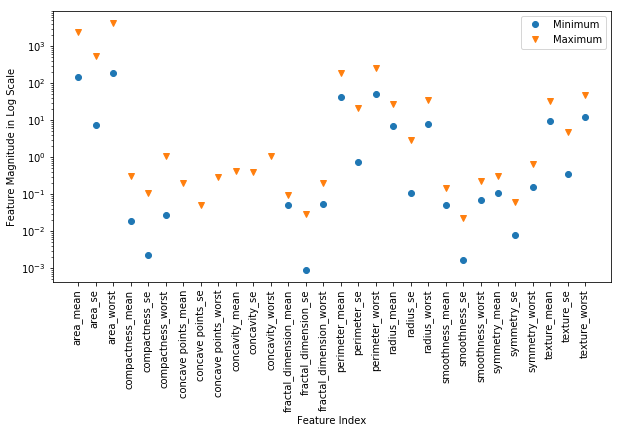

In [49]:
plt.figure(figsize=(10,5))
plt.plot(X_train.min(axis=0), 'o', label='Minimum')
plt.plot(X_train.max(axis=0), 'v', label='Maximum')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [50]:
#Finding the minimum values for each feature
min_train = X_train.min(axis=0)
#Finding the range of each feature
range_train = (X_train - min_train).max(axis=0)
#Scaling the features between the the range 0 to 1 
X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64
Maximum per feature
radius_mean    

In [84]:
X_test_scaled = (X_test - min_train)/range_train

svm1 = SVC(probability = True)
svm1.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.626
The accuracy on the test subset: 0.632


In [53]:
prediction = svm1.predict(X_test_scaled)

In [54]:
print(confusion_matrix(y_test,prediction))

[[107   1]
 [  8  55]]


In [55]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       108
          1       0.98      0.87      0.92        63

avg / total       0.95      0.95      0.95       171



So after scaling our data, we can see that our new model is now able to predict much better than the previous model. Now it is able to classify into whether the tumor is "Malignant" or "Benign" more effectively. We can also see that out accuracy score on the test subset is much better.

### Gridsearch
  * Finding the right parameters (like what C or gamma values to use) is a tricky task!
    his idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this       method is common enough that Scikit-learn has this functionality built in with GridSearchCV
    
  * GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of       parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.  

In [56]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','sigmoid']} 

In [57]:
from sklearn.model_selection import GridSearchCV

 It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier.

In [68]:
grid = GridSearchCV(SVC(probability = True),param_grid,refit=True,verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [69]:
#Fiting our model based on the hyper-parametres and the classifier selected
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9621212121212122, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9548872180451128, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9398496240601504, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.946969696969697, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid .........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.6090225563909775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.6060606060606061, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8787878787878788, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9548872180451128, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.9398496240601504, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=li

[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.946969696969697, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8939393939393939, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9774436090225563, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9624060150375939, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9772727272727273, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.6240601503759399, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.6287878787878788, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9774436090225563, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9398496240601504, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9848484848484849, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=10, gamma=0.0001, kernel=sigmoid, score=0.6240601503759399, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=10, gamma=0.0001, kernel=sigmoid, score=0.6240601503759399, total=   0.0s
[CV] C=10, 

[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.2727272727272727, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9699248120300752, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9772727272727273, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9699248120300752, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9323308270676691, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9696969696969697, total=   0.0s
[CV] C=1000, gamma=0.1, 

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [70]:
#Finding the best hyper-parametres for our model depening upon the dataset
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [71]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
g_prediction = grid.predict(X_test_scaled)

In [73]:
print(confusion_matrix(y_test,g_prediction))

[[107   1]
 [  3  60]]


In [74]:
print(classification_report(y_test,g_prediction))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       108
          1       0.98      0.95      0.97        63

avg / total       0.98      0.98      0.98       171



After using the gridsearch and finding the best parametres for our dataset , we are able to classify the tumour more accurately and we can see that our accuracy score is a little better than before.

**Plotting ROC curve**

**Grid AUC**

In [89]:
log_roc_auc3 = roc_auc_score(y_test, grid.predict(X_test_scaled))
print ("GRID AUC: ", log_roc_auc3 )

GRID AUC:  0.971560846561


**Unscaled SVM**

In [90]:
log_roc_auc2 = roc_auc_score(y_test, svm.predict(X_test))
print ("Unscaled SVM AUC: ", log_roc_auc2 )

Unscaled SVM AUC:  0.5


**Scaled SVM**

In [91]:
log_roc_auc1 = roc_auc_score(y_test, svm1.predict(X_test_scaled))
print ("Scaled SVM AUC: ", log_roc_auc1 )

Scaled SVM AUC:  0.931878306878


In [93]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, grid.predict_proba(X_test_scaled)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, svm1.predict_proba(X_test_scaled)[:,1])

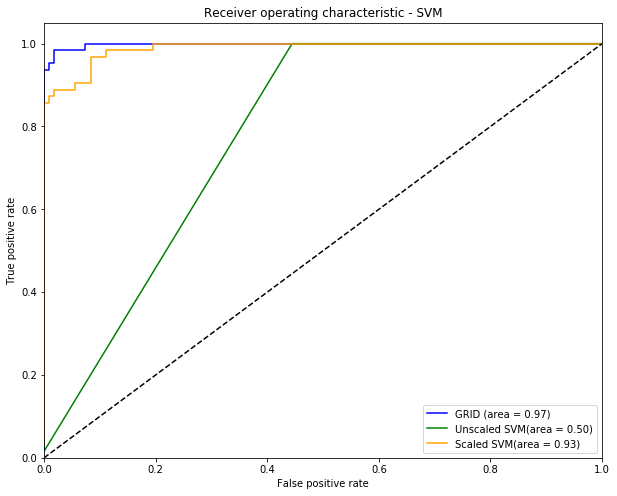

In [96]:
plt.figure(figsize = (10,8))
plt.plot(fpr3, tpr3, label ="GRID (area = %0.2f)" % log_roc_auc3, color ="blue")
plt.plot(fpr2, tpr2, label ="Unscaled SVM(area = %0.2f)" % log_roc_auc2, color ="green")
plt.plot(fpr1, tpr1, label ="Scaled SVM(area = %0.2f)" % log_roc_auc1, color ="orange")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

## FUTURE SCOPE
---

- Prediction of Cancer Recurrence: Neural Network (MLP, TensorFlow)
- Prediction of Cancer survivability: Automatic feature selection (SelectPercentile)